In [8]:
import sys
import os
import numpy as np
import pandas as pd

PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), ".."))
if PROJECT_ROOT not in sys.path:
    sys.path.insert(0, PROJECT_ROOT)

from src.models.decision_tree import DecisionTreeModel
from src.dataset import Dataset
from src.utils import ModelIO

pd.set_option("display.width", 1000)
pd.set_option("display.expand_frame_repr", False)

In [9]:
dataset = Dataset()
f_train, f_test, l_train, l_test = dataset.split_data(target_column = 'LUNG_CANCER')

In [10]:
model = DecisionTreeModel(
    max_depth=7,
    min_samples_leaf=3
)

model.train(f_train, l_train)

In [11]:
print("=============== TRAINING SET ===============")
model.score(f_train, l_train)

=============== TRAINING SET ===============

Confusion Matrix:
Predicted   0    1
Actual            
0          21    5
1           8  186

TN=21, FP=5, FN=8, TP=186

Accuracy : 0.9409
Recall   : 0.9588   (TP/(TP+FN))
Precision: 0.9738   (TP/(TP+FP))
F1-score : 0.9662   (2*P*R/(P+R))
AUC      : N/A (predict_proba not supported)


In [12]:
print("=============== TESTING SET ===============")
model.score(f_test, l_test)

=============== TESTING SET ===============

Confusion Matrix:
Predicted  0   1
Actual          
0          6   6
1          1  43

TN=6, FP=6, FN=1, TP=43

Accuracy : 0.8750
Recall   : 0.9773   (TP/(TP+FN))
Precision: 0.8776   (TP/(TP+FP))
F1-score : 0.9247   (2*P*R/(P+R))
AUC      : N/A (predict_proba not supported)


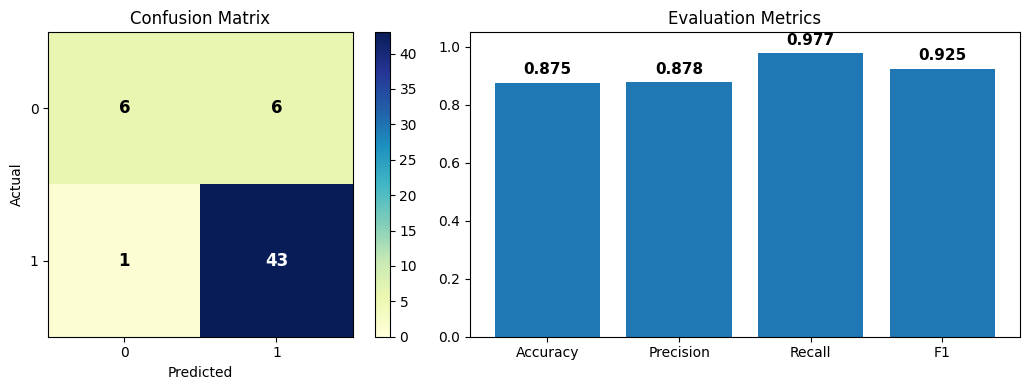

In [13]:
model.plot_evaluation()

In [14]:
ModelIO.save(model, "decision_tree_model.pkl")

Model saved to: lung_cancer_RF/checkpoints/decision_tree_model.pkl


True